# Code Modules & Helpful Functions

In [0]:
import warnings; warnings.filterwarnings('ignore')
import os,h5py,urllib,zipfile
import pandas as pd,numpy as np,xgboost as xgb
import pylab as pl,seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
def ohe(x): 
    return OneHotEncoder(categories='auto')\
           .fit(x.reshape(-1,1))\
           .transform(x.reshape(-1,1))\
           .toarray().astype('int64')
def tts(X,y): 
    x_train,x_test,y_train,y_test=\
    train_test_split(X,y,test_size=float(.2),
                     random_state=1)
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    return x_train,x_valid,x_test,y_train,y_valid,y_test

# Data Loading & Preprocessing

In [22]:
(x_train1,y_train1),(x_test1,y_test1)=mnist.load_data()
n=int(len(x_test1)/2)
x_valid1,y_valid1=x_test1[:n],y_test1[:n]
x_test1,y_test1=x_test1[n:],y_test1[n:]
#cy_train1=to_categorical(y_train1,10)
#cy_valid1=to_categorical(y_valid1,10)
#cy_test1=to_categorical(y_test1,10)
x_train1=x_train1.reshape(-1,784)
x_test1=x_test1.reshape(-1,784)
x_valid1=x_valid1.reshape(-1,784)
[el.shape for el in [x_train1,x_valid1,x_test1,
                     y_train1,y_valid1,y_test1]]

[(60000, 784), (5000, 784), (5000, 784), (60000,), (5000,), (5000,)]

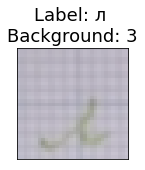

In [23]:
fpath='https://olgabelitskaya.github.io/'
zf='LetterColorImages_123.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb')
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys())
letters=u'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
letter_backgrounds=np.array(f[keys[0]])
letter_images=np.array(f[keys[1]])/255
letter_labels=np.array(f[keys[2]])
pl.figure(figsize=(2,3)); il=10**4
pl.xticks([]); pl.yticks([])
pl.title('Label: %s \n'%letters[letter_labels[il]-1]+\
         'Background: %s'%letter_backgrounds[il],
         fontsize=18)
pl.imshow(letter_images[il]); pl.show()

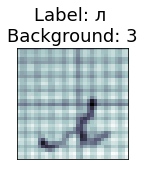

In [24]:
letter_gimages=np.dot(letter_images[...,:3],[.299,.587,.114])
pl.figure(figsize=(2,3))
pl.title('Label: %s \n'%letters[letter_labels[il]-1]+\
         'Background: %s'%letter_backgrounds[il],
         fontsize=18)
pl.imshow(letter_gimages[il],cmap=pl.cm.bone)
pl.xticks([]); pl.yticks([]); pl.show()

In [25]:
letter_cbackgrounds,letter_clabels=\
ohe(letter_backgrounds),ohe(letter_labels)
letter_ctargets=\
np.concatenate((letter_clabels,letter_cbackgrounds),axis=1)
pd.DataFrame([letter_clabels.shape,letter_cbackgrounds.shape,
              letter_ctargets.shape])

,0,1
0,14190,33
1,14190,4
2,14190,37


In [26]:
x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2=tts(letter_images,letter_labels)
x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3=tts(letter_gimages,letter_labels)
#ny_train2=np.array([np.argmax(y) for y in y_train2])
#ny_valid2=np.array([np.argmax(y) for y in y_valid2])
#ny_test2=np.array([np.argmax(y) for y in y_test2])
#ny_train3=np.array([np.argmax(y) for y in y_train3])
#ny_valid3=np.array([np.argmax(y) for y in y_valid3])
#ny_test3=np.array([np.argmax(y) for y in y_test3])
[el.shape for el in [x_train2,x_valid2,x_test2,
                     y_train2,y_valid2,y_test2,
                     x_train3,x_valid3,x_test3,
                     y_train3,y_valid3,y_test3]]

[(11352, 32, 32, 3),
 (1419, 32, 32, 3),
 (1419, 32, 32, 3),
 (11352,),
 (1419,),
 (1419,),
 (11352, 32, 32),
 (1419, 32, 32),
 (1419, 32, 32),
 (11352,),
 (1419,),
 (1419,)]

# Models

In [8]:
params={'objective':'multi:softprob','verbosity':2,
        'random_state':42,'num_class':10,
        'n_estimators':784,'learning_rate':.3,'max_depth':11,
        'tree_method':'gpu_hist','predictor':'gpu_predictor'}
clf=xgb.XGBClassifier(**params)
clf.fit(x_train1,y_train1,eval_metric='mlogloss',
        eval_set=[(x_train1,y_train1),(x_valid1,y_valid1)])

[0]	validation_0-mlogloss:1.17561	validation_1-mlogloss:1.27893
[1]	validation_0-mlogloss:0.833975	validation_1-mlogloss:0.967851
[2]	validation_0-mlogloss:0.615816	validation_1-mlogloss:0.765482
[3]	validation_0-mlogloss:0.464556	validation_1-mlogloss:0.62443
[4]	validation_0-mlogloss:0.355274	validation_1-mlogloss:0.5216
[5]	validation_0-mlogloss:0.273848	validation_1-mlogloss:0.444153
[6]	validation_0-mlogloss:0.21232	validation_1-mlogloss:0.383297
[7]	validation_0-mlogloss:0.165781	validation_1-mlogloss:0.33568
[8]	validation_0-mlogloss:0.130397	validation_1-mlogloss:0.298949
[9]	validation_0-mlogloss:0.103016	validation_1-mlogloss:0.26906
[10]	validation_0-mlogloss:0.081651	validation_1-mlogloss:0.245504
[11]	validation_0-mlogloss:0.065473	validation_1-mlogloss:0.227697
[12]	validation_0-mlogloss:0.052593	validation_1-mlogloss:0.212408
[13]	validation_0-mlogloss:0.042733	validation_1-mlogloss:0.200399
[14]	validation_0-mlogloss:0.034831	validation_1-mlogloss:0.189185
[15]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=784, n_jobs=1,
              nthread=None, num_class=10, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=2)

In [9]:
print(clf.evals_result())
y_xgb_train1=clf.predict(x_train1)
y_xgb_valid1=clf.predict(x_valid1)
y_xgb_test1=clf.predict(x_test1)
for [y,py] in [[y_train1,y_xgb_train1],
               [y_valid1,y_xgb_valid1],
               [y_test1,y_xgb_test1]]:
    print(metrics.accuracy_score(y,py))
    print(metrics.confusion_matrix(y,py))

{'validation_0': {'mlogloss': [1.175614, 0.833975, 0.615816, 0.464556, 0.355274, 0.273848, 0.21232, 0.165781, 0.130397, 0.103016, 0.081651, 0.065473, 0.052593, 0.042733, 0.034831, 0.028891, 0.023968, 0.020121, 0.017125, 0.014628, 0.012641, 0.010985, 0.009626, 0.008549, 0.007597, 0.006819, 0.006156, 0.005581, 0.005074, 0.004668, 0.004291, 0.003956, 0.00367, 0.003429, 0.003201, 0.002996, 0.002824, 0.002668, 0.002526, 0.002388, 0.002273, 0.002168, 0.002072, 0.001982, 0.001902, 0.00183, 0.001761, 0.001694, 0.001635, 0.00158, 0.001529, 0.001478, 0.001433, 0.001389, 0.001347, 0.001309, 0.001274, 0.00124, 0.00121, 0.00118, 0.001152, 0.001124, 0.001099, 0.001075, 0.001053, 0.00103, 0.00101, 0.000989, 0.00097, 0.00095, 0.000932, 0.000914, 0.000897, 0.000881, 0.000867, 0.000852, 0.000839, 0.000824, 0.000812, 0.000799, 0.000787, 0.000775, 0.000763, 0.000752, 0.000742, 0.00073, 0.00072, 0.000711, 0.000702, 0.000694, 0.000685, 0.000676, 0.000668, 0.00066, 0.000652, 0.000644, 0.000636, 0.000628, 0.0

In [10]:
clf2=xgb.XGBClassifier(objective="multi:softprob",
                       verbosity=2,num_class=33,
                       random_state=42,learning_rate=.05,
                       max_depth=11,n_estimators=256,
                       tree_method='gpu_hist',predictor='gpu_predictor')
clf2.fit(x_train2.reshape(-1,32*32*3),y_train2,eval_metric='mlogloss',
         eval_set=[(x_train2.reshape(-1,32*32*3),y_train2),
                   (x_valid2.reshape(-1,32*32*3),y_valid2)])

[0]	validation_0-mlogloss:3.29373	validation_1-mlogloss:3.41849
[1]	validation_0-mlogloss:3.11145	validation_1-mlogloss:3.35754
[2]	validation_0-mlogloss:2.94938	validation_1-mlogloss:3.30831
[3]	validation_0-mlogloss:2.79921	validation_1-mlogloss:3.26171
[4]	validation_0-mlogloss:2.66315	validation_1-mlogloss:3.21969
[5]	validation_0-mlogloss:2.53792	validation_1-mlogloss:3.18196
[6]	validation_0-mlogloss:2.42138	validation_1-mlogloss:3.14875
[7]	validation_0-mlogloss:2.31232	validation_1-mlogloss:3.11592
[8]	validation_0-mlogloss:2.21131	validation_1-mlogloss:3.08434
[9]	validation_0-mlogloss:2.11712	validation_1-mlogloss:3.05835
[10]	validation_0-mlogloss:2.02804	validation_1-mlogloss:3.03161
[11]	validation_0-mlogloss:1.94347	validation_1-mlogloss:3.0059
[12]	validation_0-mlogloss:1.86333	validation_1-mlogloss:2.9827
[13]	validation_0-mlogloss:1.78797	validation_1-mlogloss:2.96107
[14]	validation_0-mlogloss:1.71588	validation_1-mlogloss:2.93831
[15]	validation_0-mlogloss:1.64717	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=256, n_jobs=1,
              nthread=None, num_class=33, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=2)

In [11]:
print(clf2.evals_result())
y_xgb_train2=clf2.predict(x_train2.reshape(-1,32*32*3))
y_xgb_valid2=clf2.predict(x_valid2.reshape(-1,32*32*3))
y_xgb_test2=clf2.predict(x_test2.reshape(-1,32*32*3))
for [y,py] in [[y_train2,y_xgb_train2],
               [y_valid2,y_xgb_valid2],
               [y_test2,y_xgb_test2]]:
    print(metrics.accuracy_score(y,py))
    print(metrics.confusion_matrix(y,py))

{'validation_0': {'mlogloss': [3.293727, 3.111453, 2.949379, 2.799214, 2.663151, 2.537916, 2.421381, 2.31232, 2.211312, 2.117121, 2.028044, 1.94347, 1.86333, 1.787969, 1.715878, 1.64717, 1.581864, 1.520317, 1.460654, 1.405048, 1.35158, 1.301199, 1.253291, 1.207422, 1.164066, 1.122797, 1.083056, 1.045264, 1.008778, 0.973825, 0.941092, 0.909415, 0.87917, 0.849711, 0.821833, 0.794613, 0.769057, 0.74376, 0.719784, 0.696914, 0.674915, 0.653759, 0.633718, 0.613919, 0.594855, 0.577272, 0.559821, 0.542966, 0.527027, 0.512, 0.497184, 0.483094, 0.468807, 0.455549, 0.442701, 0.430394, 0.418331, 0.40693, 0.396202, 0.385417, 0.375075, 0.365158, 0.354982, 0.345708, 0.336409, 0.327596, 0.319035, 0.310862, 0.302832, 0.295304, 0.288013, 0.280905, 0.273977, 0.26724, 0.260892, 0.254749, 0.248581, 0.242603, 0.237058, 0.23178, 0.226415, 0.221126, 0.216152, 0.211476, 0.206726, 0.202271, 0.19793, 0.193528, 0.189457, 0.185392, 0.181487, 0.177693, 0.173854, 0.170315, 0.166708, 0.163173, 0.159827, 0.156569, 0.1

In [29]:
clf3=xgb.XGBClassifier(objective="multi:softprob",
                       verbosity=2,num_class=33,
                       random_state=42,max_depth=16,
                       tree_method='gpu_hist',predictor='gpu_predictor')
clf3.fit(x_train3.reshape(-1,32*32),y_train3,eval_metric='mlogloss',
         eval_set=[(x_train3.reshape(-1,32*32),y_train3),
                   (x_valid3.reshape(-1,32*32),y_valid3)])

[0]	validation_0-mlogloss:3.10574	validation_1-mlogloss:3.38258
[1]	validation_0-mlogloss:2.78108	validation_1-mlogloss:3.28848
[2]	validation_0-mlogloss:2.50778	validation_1-mlogloss:3.21198
[3]	validation_0-mlogloss:2.27306	validation_1-mlogloss:3.14896
[4]	validation_0-mlogloss:2.06633	validation_1-mlogloss:3.10206
[5]	validation_0-mlogloss:1.88399	validation_1-mlogloss:3.05614
[6]	validation_0-mlogloss:1.72365	validation_1-mlogloss:3.01202
[7]	validation_0-mlogloss:1.57979	validation_1-mlogloss:2.97432
[8]	validation_0-mlogloss:1.4514	validation_1-mlogloss:2.94123
[9]	validation_0-mlogloss:1.33621	validation_1-mlogloss:2.90925
[10]	validation_0-mlogloss:1.23225	validation_1-mlogloss:2.88199
[11]	validation_0-mlogloss:1.13741	validation_1-mlogloss:2.85592
[12]	validation_0-mlogloss:1.0515	validation_1-mlogloss:2.83079
[13]	validation_0-mlogloss:0.974176	validation_1-mlogloss:2.80656
[14]	validation_0-mlogloss:0.903294	validation_1-mlogloss:2.7824
[15]	validation_0-mlogloss:0.838551	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=33, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=2)

In [30]:
print(clf3.evals_result())
y_xgb_train3=clf3.predict(x_train3.reshape(-1,32*32))
y_xgb_valid3=clf3.predict(x_valid3.reshape(-1,32*32))
y_xgb_test3=clf3.predict(x_test3.reshape(-1,32*32))
for [y,py] in [[y_train3,y_xgb_train3],
               [y_valid3,y_xgb_valid3],
               [y_test3,y_xgb_test3]]:
    print(metrics.accuracy_score(y,py))
    print(metrics.confusion_matrix(y,py))

{'validation_0': {'mlogloss': [3.105739, 2.781078, 2.507779, 2.273059, 2.066332, 1.883994, 1.723653, 1.579787, 1.451401, 1.336214, 1.232247, 1.137406, 1.051501, 0.974176, 0.903294, 0.838551, 0.779171, 0.724699, 0.675269, 0.629074, 0.586839, 0.548229, 0.512859, 0.480254, 0.450359, 0.422394, 0.396351, 0.372519, 0.351061, 0.331053, 0.312335, 0.29485, 0.278551, 0.263441, 0.249104, 0.236012, 0.223779, 0.212407, 0.201665, 0.191877, 0.182635, 0.174116, 0.166152, 0.158555, 0.151425, 0.144934, 0.138728, 0.132862, 0.127325, 0.122175, 0.117219, 0.112651, 0.108313, 0.104298, 0.100493, 0.096934, 0.09358, 0.090391, 0.087306, 0.084379, 0.081663, 0.07905, 0.076576, 0.074214, 0.07192, 0.069728, 0.067698, 0.065749, 0.063879, 0.062105, 0.06041, 0.058769, 0.057195, 0.055701, 0.054286, 0.052962, 0.051648, 0.050407, 0.049222, 0.048076, 0.046997, 0.045933, 0.04493, 0.043963, 0.04303, 0.042137, 0.041268, 0.040441, 0.039641, 0.038882, 0.038149, 0.037423, 0.036742, 0.036079, 0.035437, 0.034816, 0.03421, 0.03363